In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# 读取当前文件夹下的 Data.xlsx 文件
df = pd.read_excel('Data.xlsx')
I = df.loc[0:29, 'Current(A)']
B = df.loc[0:29, 'MagField(mT)']
offset = -73
B = B - offset
Iup = I.loc[0:15]
Idown = I.loc[15:29]
Bup = B.loc[0:15]
Bdown = B.loc[15:29]
plt.plot(Iup, Bup, 'D', label='Up')
plt.plot(Idown, Bdown, 'D', markerfacecolor='none', label='Down')
# 对I-B进行三次多项式拟合
coefficients = np.polyfit(I, B, 3)

# 生成拟合曲线
I_fit = np.linspace(I.min(), I.max(), 100)
B_fit = np.polyval(coefficients, I_fit)

# 画出拟合曲线
plt.plot(I_fit, B_fit,'k--',label='Fit')
plt.xlabel('Current(A)')
plt.ylabel('MagField(mT)')
plt.legend()
plt.gcf().set_size_inches(10, 6.75)
plt.show()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [18]:
# 生成多项式对象
polynomial = np.poly1d(coefficients)

# 打印拟合公式
print(polynomial)

        3        2
-6.548 x + 26.1 x + 280.6 x + 13.22


In [24]:
# 定义电流值
current_values = [0.9,2.55,5.05]

# 计算对应的磁场值
magnetic_fields = polynomial(current_values)

# 打印结果
for current, field in zip(current_values, magnetic_fields):
    print(f"Current: {current} A, Magnetic Field: {field} mT")

Current: 0.9 A, Magnetic Field: 282.0987127398489 mT
Current: 2.55 A, Magnetic Field: 789.8102811045151 mT
Current: 5.05 A, Magnetic Field: 1252.4211802365983 mT


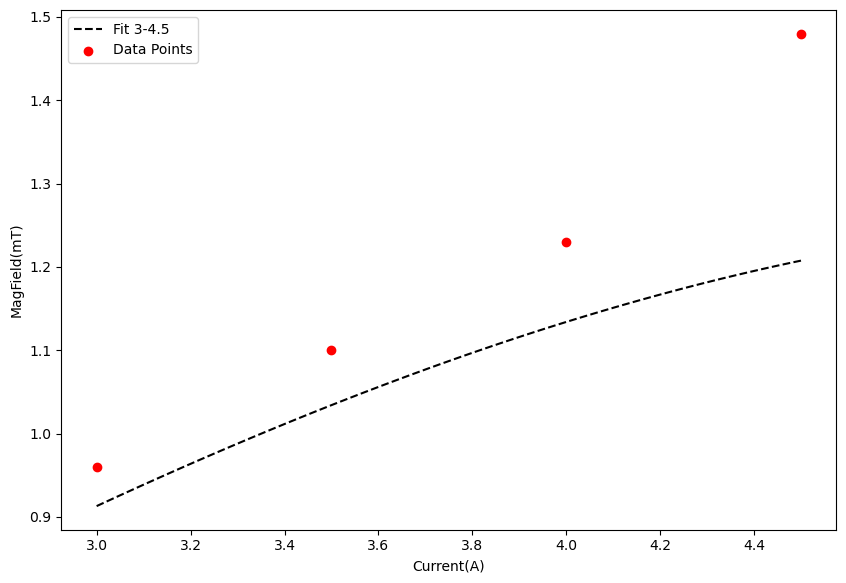

In [ ]:
I = [3,3.5,4,4.5]
B = [0.96,1.10,1.23,1.48]
# 生成拟合曲线
I_fit_new = np.linspace(3, 4.5, 100)
B_fit_new = np.polyval(polynomial, I_fit_new)

# 绘制拟合曲线
plt.plot(I_fit_new, B_fit_new/1000, 'k--', label='Fit 3-4.5')

# 绘制散点
plt.scatter(I, B, color='red', label='Data Points')

plt.xlabel('Current(A)')
plt.ylabel('MagField(mT)')
plt.legend()
plt.gcf().set_size_inches(10, 6.75)
plt.show()